In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from model import Net
from utils import train, test

In [2]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [3]:
imgs = [item[0] for item in cifar_trainset]
labels = [item[1] for item in cifar_trainset]

imgs = torch.stack(imgs, dim=0).numpy()

mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()
mu = [mean_r,mean_g,mean_b]
print(mu)

std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
sigma = [std_r,std_g,std_b]
print(sigma)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

[0.49139968, 0.48215827, 0.44653124]
[0.24703233, 0.24348505, 0.26158768]


In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net(n_type = 'LN').to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
         GroupNorm-3           [-1, 16, 30, 30]              32
            Conv2d-4           [-1, 32, 28, 28]           4,608
              ReLU-5           [-1, 32, 28, 28]               0
         GroupNorm-6           [-1, 32, 28, 28]              64
            Conv2d-7           [-1, 16, 28, 28]             512
         MaxPool2d-8           [-1, 16, 14, 14]               0
            Conv2d-9           [-1, 16, 12, 12]           2,304
             ReLU-10           [-1, 16, 12, 12]               0
        GroupNorm-11           [-1, 16, 12, 12]              32
           Conv2d-12           [-1, 32, 10, 10]           4,608
             ReLU-13           [-1, 32, 10, 10]               0
        GroupNorm-14           [-1, 32,

In [5]:
torch.manual_seed(1)
batch_size = 256

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mu, sigma),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mu, sigma)
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Files already downloaded and verified


In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [7]:
model = Net(n_type = 'LN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)

criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.7096 Batch_id=195 Accuracy=36.11: 100%|██████████| 196/196 [00:19<00:00,  9.99it/s]


Test set: Average loss: 1.4361, Accuracy: 4776/10000 (47.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.1376 Batch_id=195 Accuracy=52.19: 100%|██████████| 196/196 [00:18<00:00, 10.47it/s]


Test set: Average loss: 1.1880, Accuracy: 5662/10000 (56.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.1678 Batch_id=195 Accuracy=59.46: 100%|██████████| 196/196 [00:18<00:00, 10.54it/s]


Test set: Average loss: 1.1354, Accuracy: 5897/10000 (58.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.7531 Batch_id=195 Accuracy=63.98: 100%|██████████| 196/196 [00:19<00:00, 10.29it/s]


Test set: Average loss: 1.0135, Accuracy: 6376/10000 (63.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.9239 Batch_id=195 Accuracy=66.66: 100%|██████████| 196/196 [00:18<00:00, 10.44it/s]


Test set: Average loss: 0.9575, Accuracy: 6600/10000 (66.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.8079 Batch_id=195 Accuracy=69.82: 100%|██████████| 196/196 [00:18<00:00, 10.82it/s]


Test set: Average loss: 0.9084, Accuracy: 6765/10000 (67.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.5917 Batch_id=195 Accuracy=71.64: 100%|██████████| 196/196 [00:18<00:00, 10.78it/s]


Test set: Average loss: 0.8714, Accuracy: 6910/10000 (69.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.6858 Batch_id=195 Accuracy=72.86: 100%|██████████| 196/196 [00:18<00:00, 10.37it/s]


Test set: Average loss: 0.8326, Accuracy: 7123/10000 (71.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.6600 Batch_id=195 Accuracy=74.10: 100%|██████████| 196/196 [00:18<00:00, 10.65it/s]


Test set: Average loss: 0.8252, Accuracy: 7141/10000 (71.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.5880 Batch_id=195 Accuracy=75.37: 100%|██████████| 196/196 [00:19<00:00, 10.23it/s]


Test set: Average loss: 0.7833, Accuracy: 7270/10000 (72.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.5703 Batch_id=195 Accuracy=76.19: 100%|██████████| 196/196 [00:18<00:00, 10.85it/s]


Test set: Average loss: 0.7837, Accuracy: 7275/10000 (72.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.7235 Batch_id=195 Accuracy=76.87: 100%|██████████| 196/196 [00:18<00:00, 10.41it/s]


Test set: Average loss: 0.7754, Accuracy: 7301/10000 (73.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.4161 Batch_id=195 Accuracy=77.61: 100%|██████████| 196/196 [00:18<00:00, 10.79it/s]


Test set: Average loss: 0.7594, Accuracy: 7320/10000 (73.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.7999 Batch_id=195 Accuracy=78.36: 100%|██████████| 196/196 [00:17<00:00, 10.89it/s]


Test set: Average loss: 0.7770, Accuracy: 7339/10000 (73.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.6603 Batch_id=195 Accuracy=78.98: 100%|██████████| 196/196 [00:19<00:00, 10.28it/s]


Test set: Average loss: 0.7522, Accuracy: 7426/10000 (74.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.3371 Batch_id=195 Accuracy=83.16: 100%|██████████| 196/196 [00:18<00:00, 10.34it/s]


Test set: Average loss: 0.6930, Accuracy: 7603/10000 (76.03%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.5875 Batch_id=195 Accuracy=83.90: 100%|██████████| 196/196 [00:22<00:00,  8.75it/s]


Test set: Average loss: 0.6994, Accuracy: 7600/10000 (76.00%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.4647 Batch_id=195 Accuracy=84.20: 100%|██████████| 196/196 [00:18<00:00, 10.81it/s]


Test set: Average loss: 0.6999, Accuracy: 7619/10000 (76.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.2960 Batch_id=195 Accuracy=84.52: 100%|██████████| 196/196 [00:18<00:00, 10.81it/s]


Test set: Average loss: 0.7071, Accuracy: 7583/10000 (75.83%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.4400 Batch_id=195 Accuracy=84.71: 100%|██████████| 196/196 [00:19<00:00, 10.27it/s]


Test set: Average loss: 0.7049, Accuracy: 7605/10000 (76.05%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

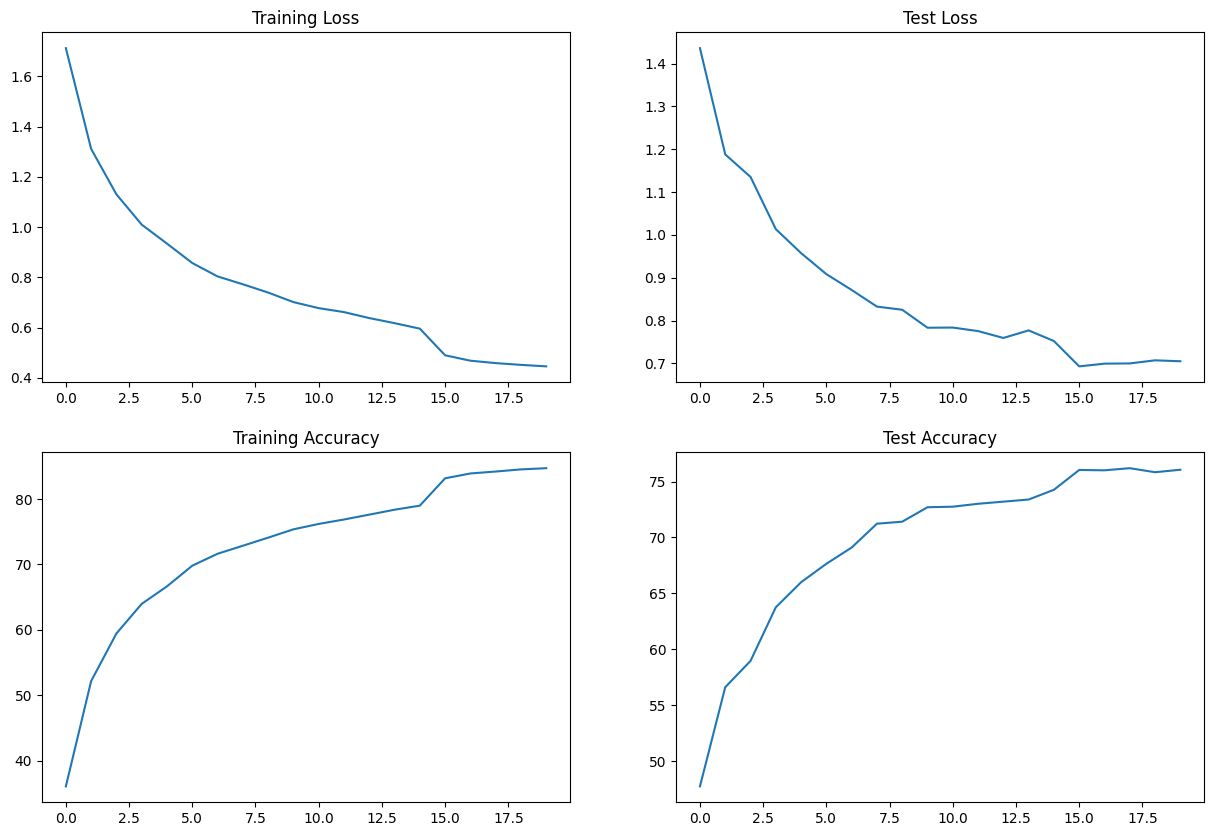

In [8]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [9]:
def plot_misclassified(image, pred, target):

    nrows = 2
    ncols = 5

    fig, ax = plt.subplots(nrows, ncols, figsize=(8, 4))

    for i in range(nrows):
        for j in range(ncols):
            index = i * ncols + j
            ax[i, j].axis("off")
            ax[i, j].set_title(f"Prediction: {classes[pred[index]]}\nTarget: {classes[target[index]]}")
            ax[i, j].imshow(image[index])

Files already downloaded and verified


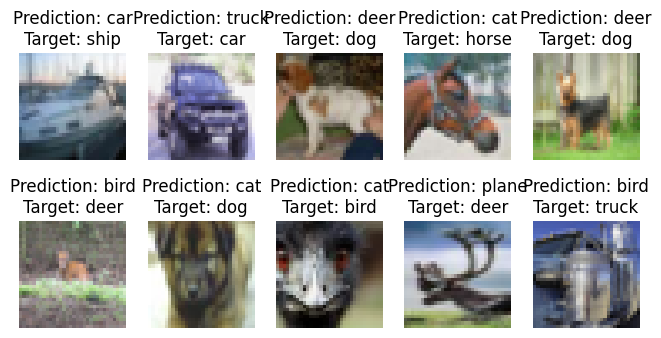

In [10]:
model.eval()
transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mu, sigma)
                    ])
misclassified_images, misclassified_predictions, true_targets = [], [], []
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True)
with torch.no_grad():
    for data_, target in cifar_testset:
        data = transform(data_).to(device)
        data = data.unsqueeze(0)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)

        if pred.item()!=target:
            misclassified_images.append(data_)
            misclassified_predictions.append(pred.item())
            true_targets.append(target)

# misclassified_images = torch.cat(misclassified_images)
# misclassified_predictions = torch.cat(misclassified_predictions)
# true_targets = torch.cat(true_targets)

plot_misclassified(misclassified_images, misclassified_predictions, true_targets)
plt.show()
